
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 4 <br>
</div>


---



### Full Name : mohamad hosein mehdikhani
### Student Number : 400102039
___

#ًQ1

In [ ]:
import numpy as np

# Dilation and Erosion

In [ ]:
def dilate(image, structuring_element):

    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    se_center_h, se_center_w = se_h // 2, se_w // 2


    output = np.zeros_like(image)


    for i in range(img_h):
        for j in range(img_w):

            if image[i, j] > 0:

                for m in range(se_h):
                    for n in range(se_w):
                        if structuring_element[m, n] > 0:

                            new_i = i + (m - se_center_h)
                            new_j = j + (n - se_center_w)


                            if 0 <= new_i < img_h and 0 <= new_j < img_w:
                                output[new_i, new_j] = 1

    return output


In [ ]:
def erode(image, structuring_element):

    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    se_center_h, se_center_w = se_h // 2, se_w // 2

    output = np.zeros_like(image)

    for i in range(img_h):
        for j in range(img_w):

            match = True
            for m in range(se_h):
                for n in range(se_w):
                    if structuring_element[m, n] > 0:

                        img_i = i + (m - se_center_h)
                        img_j = j + (n - se_center_w)


                        if (img_i < 0 or img_i >= img_h or
                            img_j < 0 or img_j >= img_w or
                            image[img_i, img_j] == 0):
                            match = False
                            break
                if not match:
                    break

            if match:
                output[i, j] = 1

    return output

## Noise Reduction

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

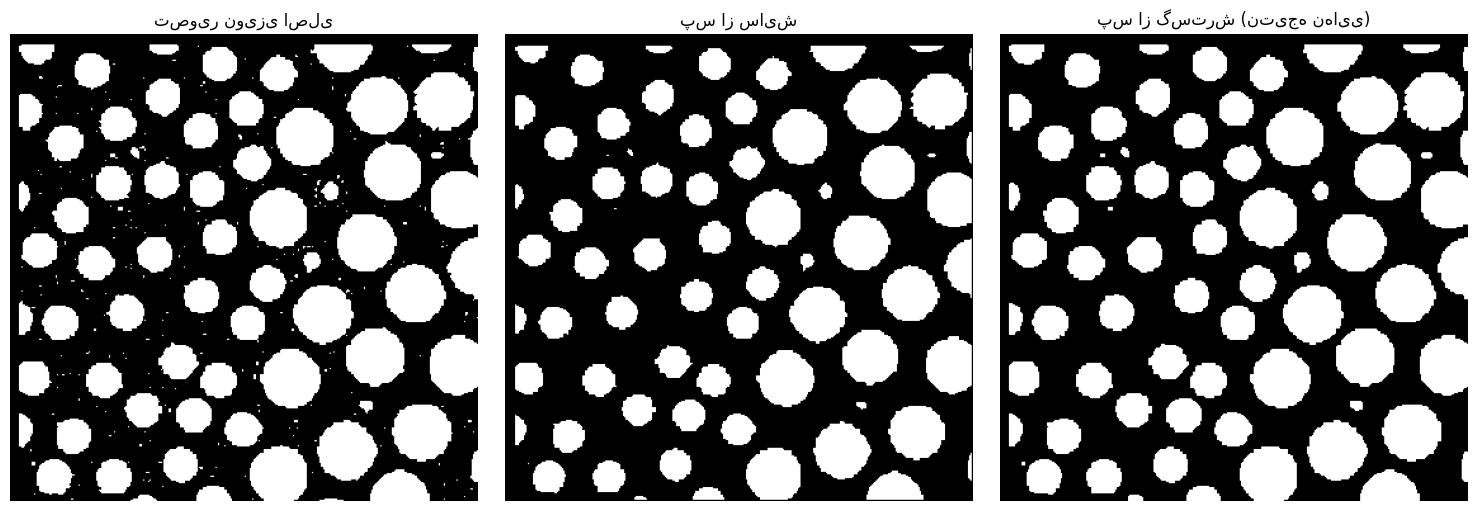

In [ ]:
path = 'noisy_image.png'
noisy_image = cv2.imread(path, 0)


_, binary_image = cv2.threshold(noisy_image, 128, 255, cv2.THRESH_BINARY)
binary_image = binary_image // 255


structuring_element = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.uint8)


eroded_image = erode(binary_image, structuring_element)
dilated_image = dilate(eroded_image, structuring_element)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('تصویر نویزی اصلی')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('پس از سایش')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('پس از گسترش (نتیجه نهایی)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Parallel Vertical Lines

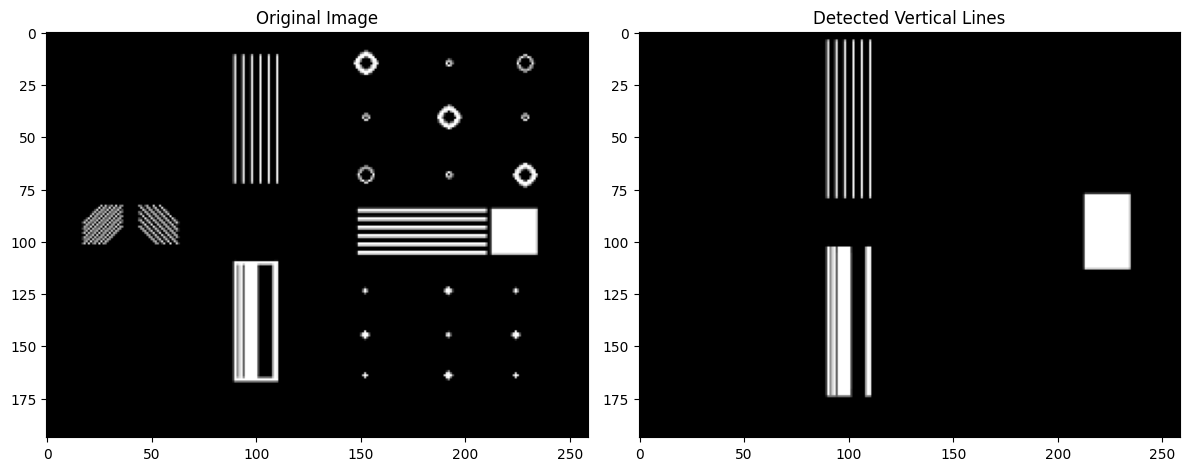

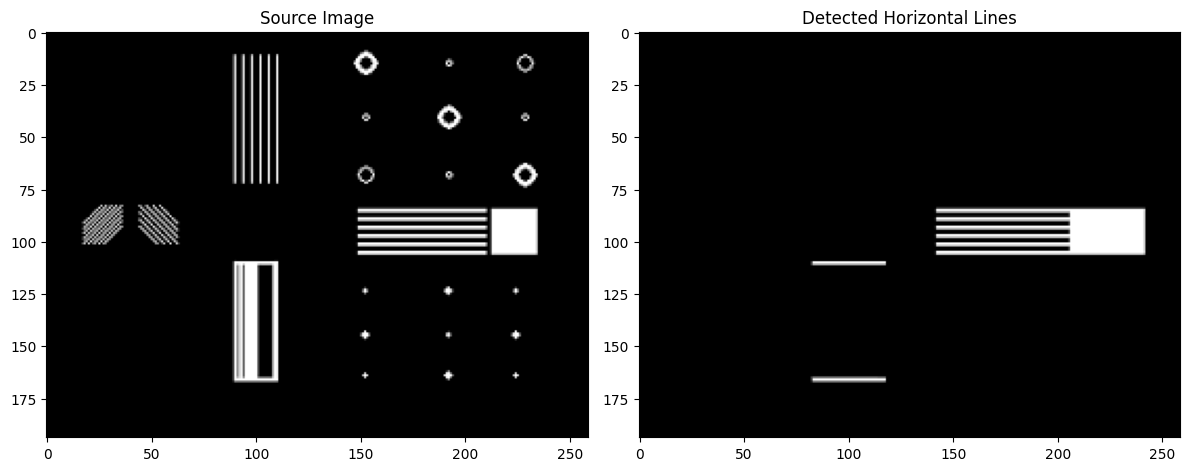

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_img = cv2.imread("Q2.png", 0)

vert_struct_element = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 15))

detected_vert_lines = cv2.morphologyEx(input_img, cv2.MORPH_OPEN, vert_struct_element)
enhanced_vert_lines = cv2.dilate(detected_vert_lines, vert_struct_element, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(input_img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(enhanced_vert_lines, cmap='gray'), plt.title('Detected Vertical Lines')
plt.tight_layout()
plt.show()

source_image = cv2.imread("Q2.png", 0)

horiz_struct_element = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))

extracted_horiz_lines = cv2.morphologyEx(source_image, cv2.MORPH_OPEN, horiz_struct_element)
strengthened_horiz_lines = cv2.dilate(extracted_horiz_lines, horiz_struct_element, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(source_image, cmap='gray'), plt.title('Source Image')
plt.subplot(1, 2, 2), plt.imshow(strengthened_horiz_lines, cmap='gray'), plt.title('Detected Horizontal Lines')
plt.tight_layout()
plt.show()

## Edge Detecting

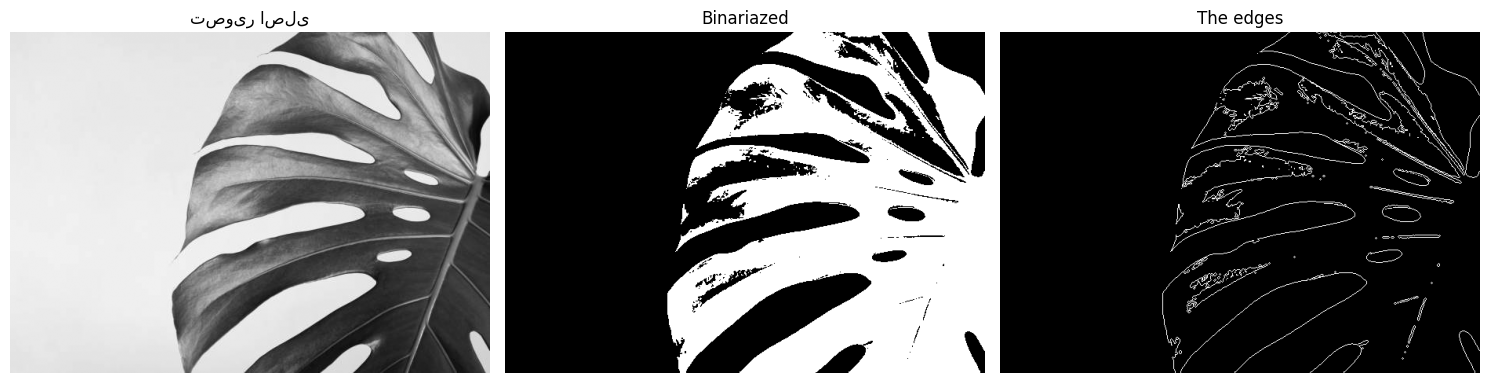

In [ ]:
path = 'leaf.jpg'
image = cv2.imread(path, 0)

_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
eroded = cv2.erode(binary, kernel, iterations=1)


boundary = binary - eroded


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('تصویر اصلی')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title('Binariazed')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(boundary, cmap='gray')
plt.title('The edges')
plt.axis('off')

plt.tight_layout()
plt.show()

#Q2

# Counting Coins

In [ ]:
from google.colab.patches import cv2_imshow

1. Thresholded image:


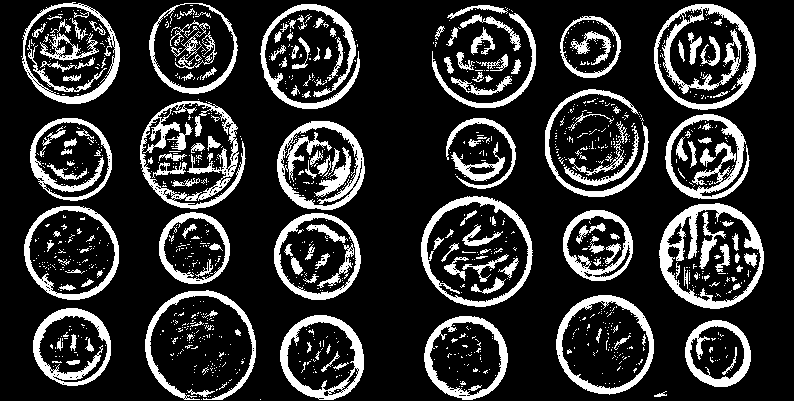


2. After morphological operations:


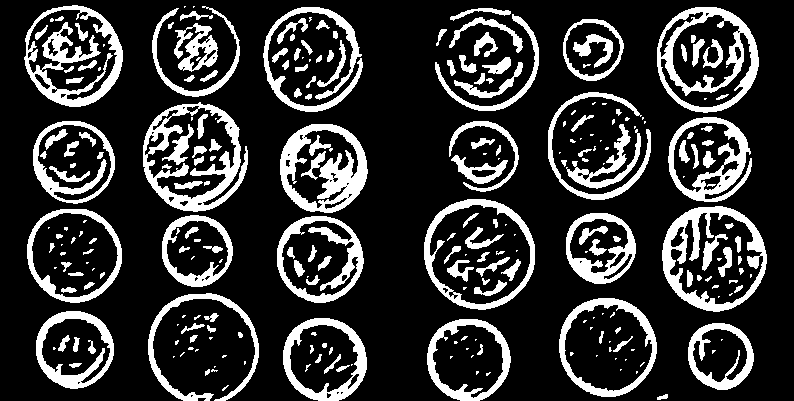


3. After contour completion:


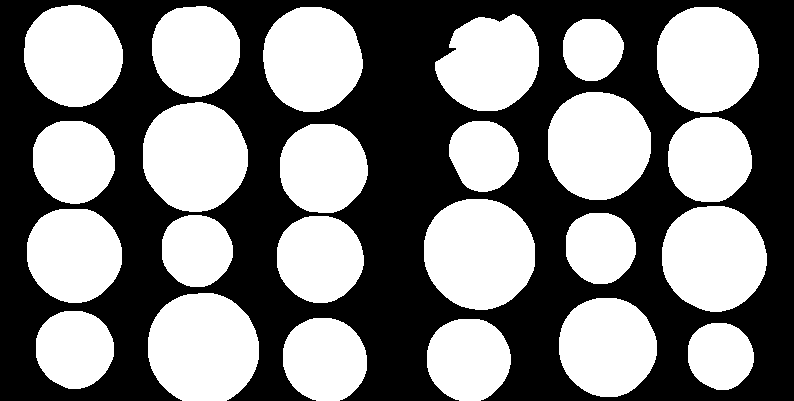


4. All detected coins:


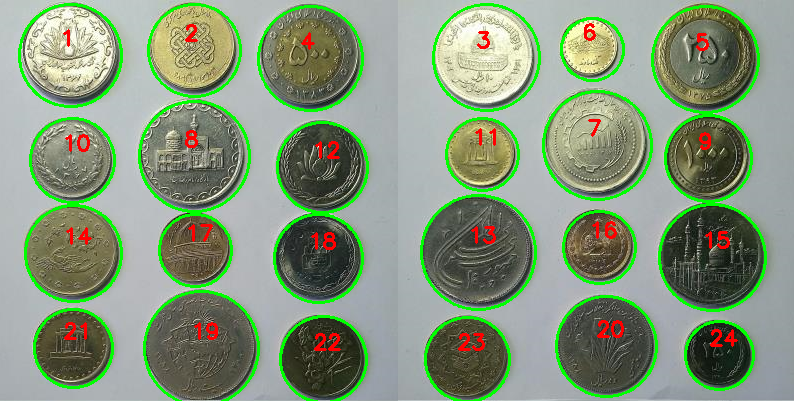


5. Small coins only (radius < 42.5 pixels):


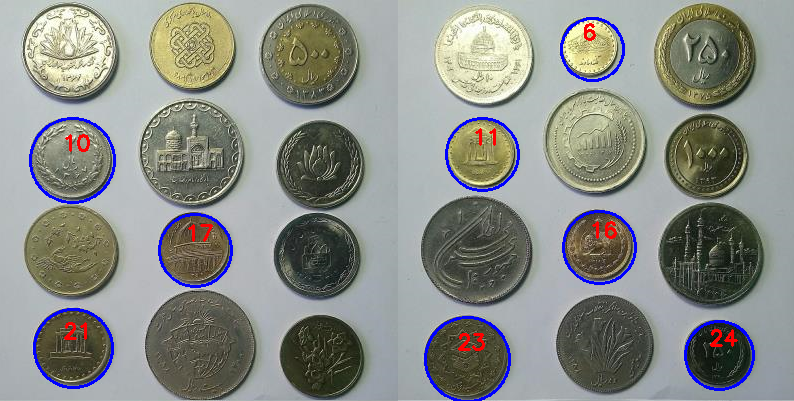


Total coins detected: 24
Small coins detected (radius < 42.5): 8


In [ ]:

image = cv2.imread('Coins.png')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.bilateralFilter(gray, 9, 75, 75)
thresh = cv2.adaptiveThreshold(blurred, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV, 21, 4)

height, width = gray.shape
kernel_size = max(1, int(min(height, width) * 0.005))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))


closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

morph = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)

filled = np.zeros_like(morph)
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:

    hull = cv2.convexHull(cnt)


    area = cv2.contourArea(hull)
    perimeter = cv2.arcLength(hull, True)
    circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter > 0 else 0

    if area > 300 and circularity > 0.5:

        cv2.drawContours(filled, [hull], 0, 255, -1)


        temp_mask = np.zeros_like(filled)
        cv2.drawContours(temp_mask, [hull], 0, 255, -1)
        internal_contours, _ = cv2.findContours(temp_mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

        if len(internal_contours) > 1:

            cv2.drawContours(filled, internal_contours, -1, 255, -1)

final_mask = np.zeros_like(filled)
contours, _ = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:

    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)

    cv2.circle(final_mask, center, radius, 255, -1)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(final_mask)





output = original.copy()
small_coins_output = original.copy()


radius_threshold = 42.5

small_coin_count = 0
for i in range(1, num_labels):

    mask = (labels == i).astype(np.uint8) * 255


    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if cnts:
        cnt = max(cnts, key=cv2.contourArea)
        (x, y), radius = cv2.minEnclosingCircle(cnt)
        center = (int(x), int(y))
        radius = int(radius)


        cv2.circle(output, center, radius, (0, 255, 0), 2)
        cv2.putText(output, str(i), (center[0]-10, center[1]-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


        if radius < radius_threshold:
            small_coin_count += 1
            cv2.circle(small_coins_output, center, radius, (255, 0, 0), 2)
            cv2.putText(small_coins_output, str(i), (center[0]-10, center[1]-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


print("1. Thresholded image:")
cv2_imshow(thresh)

print("\n2. After morphological operations:")
cv2_imshow(morph)

print("\n3. After contour completion:")
cv2_imshow(filled)

print("\n4. All detected coins:")
cv2_imshow(output)

print("\n5. Small coins only (radius < {} pixels):".format(radius_threshold))
cv2_imshow(small_coins_output)

print(f"\nTotal coins detected: {num_labels-1}")
print(f"Small coins detected (radius < {radius_threshold}): {small_coin_count}")

# Shape Descriptors

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

Load the Images

In [ ]:
import cv2
def extract_features(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {image_path}")
        return None

    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    if not contours:
        print(f"No contours found in {image_path}")
        return None

    cnt = max(contours, key=cv2.contourArea)

    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    _, _, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h if h != 0 else 0

    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area if hull_area != 0 else 0

    return [area, perimeter, aspect_ratio, solidity]


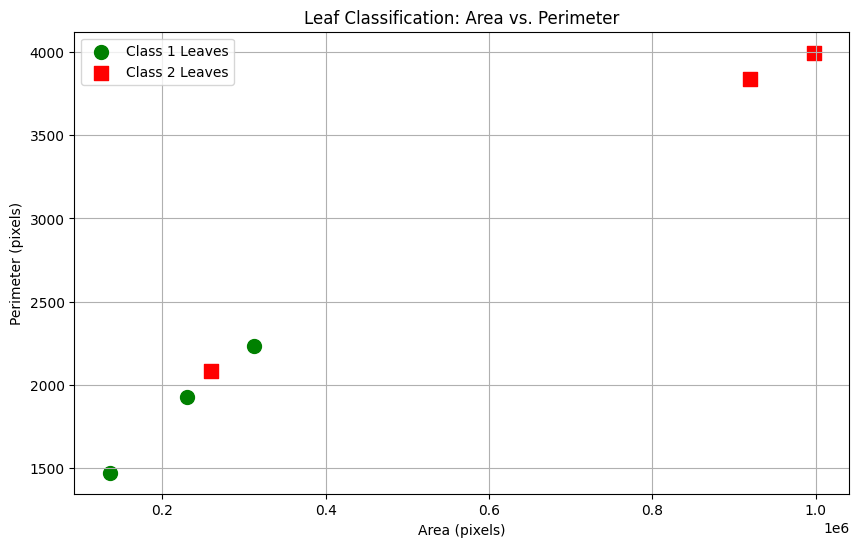

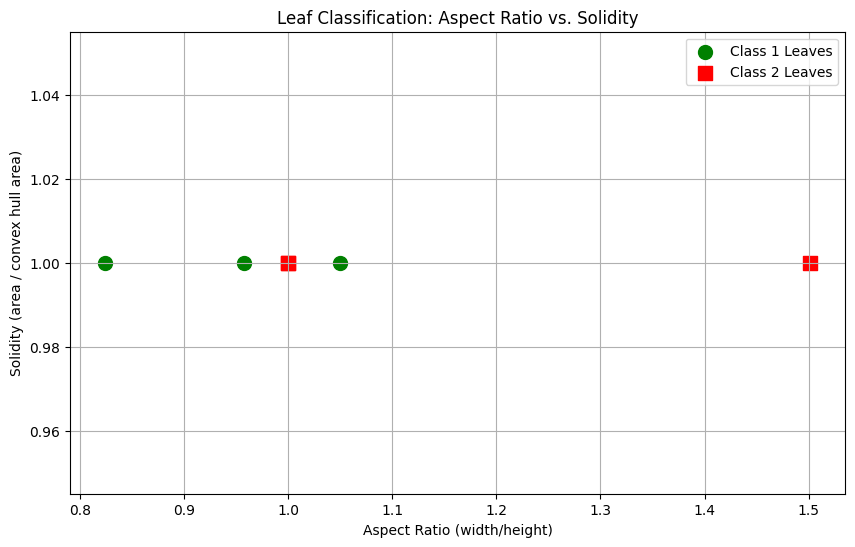

In [ ]:
import matplotlib.pyplot as plt

class1_images = ["autumn leaf (1).jpg", "autumn leaf (2).png", "autumn leaf (3).png"]  # Class 1 leaves
class2_images = ["banana leaf (1).jpg", "banana leaf (2).png","banana leaf (3).png"]  # Class 2 leaves

class1_features = [extract_features(img) for img in class1_images if extract_features(img) is not None]
class2_features = [extract_features(img) for img in class2_images if extract_features(img) is not None]

if not class1_features or not class2_features:
    print("Error: No features extracted. Check image paths and content.")
else:

    class1_areas = [f[0] for f in class1_features]
    class1_perims = [f[1] for f in class1_features]
    class2_areas = [f[0] for f in class2_features]
    class2_perims = [f[1] for f in class2_features]

    class1_aspects = [f[2] for f in class1_features]
    class1_solidities = [f[3] for f in class1_features]
    class2_aspects = [f[2] for f in class2_features]
    class2_solidities = [f[3] for f in class2_features]

    plt.figure(figsize=(10, 6))
    plt.scatter(class1_areas, class1_perims, c='green', marker='o', label='Class 1 Leaves', s=100)
    plt.scatter(class2_areas, class2_perims, c='red', marker='s', label='Class 2 Leaves', s=100)
    plt.xlabel('Area (pixels)')
    plt.ylabel('Perimeter (pixels)')
    plt.title('Leaf Classification: Area vs. Perimeter')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(class1_aspects, class1_solidities, c='green', marker='o', label='Class 1 Leaves', s=100)
    plt.scatter(class2_aspects, class2_solidities, c='red', marker='s', label='Class 2 Leaves', s=100)
    plt.xlabel('Aspect Ratio (width/height)')
    plt.ylabel('Solidity (area / convex hull area)')
    plt.title('Leaf Classification: Aspect Ratio vs. Solidity')
    plt.legend()
    plt.grid(True)
    plt.show()

Classify by a Simple Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import numpy as np
banana_leaves = ["banana leaf (1).jpg", "banana leaf (2).png","banana leaf (3).png"]  # Class 0
autumn_leaves = ["autumn leaf (1).jpg", "autumn leaf (2).png", "autumn leaf (3).png"]  # Class 1

X_banana = [extract_features(img) for img in banana_leaves if extract_features(img) is not None]
X_autumn = [extract_features(img) for img in autumn_leaves if extract_features(img) is not None]

X = np.array(X_banana + X_autumn)
y = np.array([0]*len(X_banana) + [1]*len(X_autumn))

if len(X) == 0:
    print("Error: No valid features extracted")
else:

    perceptron = Perceptron(max_iter=1000, random_state=42)
    perceptron.fit(X, y)
    perceptron_acc = perceptron.score(X, y)
    print(f"Perceptron Accuracy: {perceptron_acc:.2f}")


    mlp = MLPClassifier(hidden_layer_sizes=(), max_iter=6000, random_state=42)
    mlp.fit(X, y)
    mlp_acc = mlp.score(X, y)
    print(f"MLP (linear) Accuracy: {mlp_acc:.2f}")

    if perceptron_acc == 1.0 and mlp_acc == 1.0:
        print("The classes are perfectly linearly separable with these features!")
    else:
        print("The classes are not perfectly linearly separable.")
        print("Consider:")
        print("1. Adding more discriminative features")
        print("2. Using a non-linear classifier (add hidden layers to MLP)")
        print("3. Trying SVM with non-linear kernel")

Perceptron Accuracy: 0.50
MLP (linear) Accuracy: 0.50
The classes are not perfectly linearly separable.
Consider:
1. Adding more discriminative features
2. Using a non-linear classifier (add hidden layers to MLP)
3. Trying SVM with non-linear kernel


In [ ]:
def extract_enhanced_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return None

    cnt = max(contours, key=cv2.contourArea)


    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    _, _, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h if h != 0 else 0
    hull = cv2.convexHull(cnt)
    solidity = float(area) / cv2.contourArea(hull) if cv2.contourArea(hull) != 0 else 0

    circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0
    rectangularity = area / (w * h) if (w * h) != 0 else 0

    moments = cv2.moments(cnt)
    hu_moments = cv2.HuMoments(moments).flatten()


    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mean_color = np.mean(hsv, axis=(0,1))
    std_color = np.std(hsv, axis=(0,1))

    return [
        area, perimeter, aspect_ratio, solidity,
        circularity, rectangularity,
        *hu_moments,
        *mean_color,
        *std_color
    ]

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [ ]:

banana_leaves = ["banana leaf (1).jpg", "banana leaf (2).png","banana leaf (3).png"]  # Class 0
autumn_leaves = ["autumn leaf (1).jpg", "autumn leaf (2).png", "autumn leaf (3).png"]  # Class 1

X_banana = [extract_enhanced_features(img) for img in banana_leaves if extract_enhanced_features(img) is not None]
X_autumn = [extract_enhanced_features(img) for img in autumn_leaves if extract_enhanced_features(img) is not None]

X = np.array(X_banana + X_autumn)
y = np.array([0]*len(X_banana) + [1]*len(X_autumn))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_scaled, y)
print(f"SVM (RBF) Accuracy: {svm.score(X_scaled, y):.2f}")


mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=5000)
mlp.fit(X_scaled, y)
print(f"MLP Accuracy: {mlp.score(X_scaled, y):.2f}")

X = np.array(X_banana + X_autumn)
y = np.array([0]*len(X_banana) + [1]*len(X_autumn))


if len(X) == 0:
    print("Error: No valid features extracted")
else:

    perceptron = Perceptron(max_iter=1000, random_state=42)
    perceptron.fit(X, y)
    perceptron_acc = perceptron.score(X, y)
    print(f"Perceptron Accuracy: {perceptron_acc:.2f}")

    mlp_nonlinear = MLPClassifier(hidden_layer_sizes=(100,), max_iter=6000)
    mlp.fit(X, y)
    mlp_acc = mlp.score(X, y)
    print(f"MLP (linear) Accuracy: {mlp_acc:.2f}")


SVM (RBF) Accuracy: 1.00
MLP Accuracy: 1.00
Perceptron Accuracy: 0.50
MLP (linear) Accuracy: 0.50


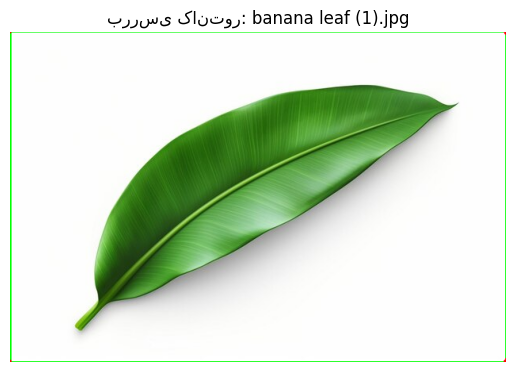

ویژگی‌های استخراج‌شده:
- مساحت: 260000.0
- محیط: 2082.0
- نسبت ابعاد: 1.50
- استحکام: 1.00
- مدوریت: 0.75


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_features_with_visualization(image_path, display=True):

    img = cv2.imread(image_path)
    if img is None:
        print(f"خطا: تصویر {image_path} یافت نشد!")
        return None


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"هشدار: هیچ کانتوری در {image_path} یافت نشد!")
        return None


    cnt = max(contours, key=cv2.contourArea)


    if display:

        img_display = img.copy()


        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_display, (x, y), (x+w, y+h), (0, 255, 0), 2)


        (cx, cy), radius = cv2.minEnclosingCircle(cnt)
        cv2.circle(img_display, (int(cx), int(cy)), int(radius), (0, 0, 255), 2)


        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title(f"بررسی کانتور: {image_path}")
        plt.axis('off')
        plt.show()


    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)


    aspect_ratio = float(w) / h if h != 0 else 0


    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area if hull_area != 0 else 0


    circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

    return [area, perimeter, aspect_ratio, solidity, circularity]

# --- تست تابع روی یک تصویر نمونه ---
sample_image = "banana leaf (1).jpg"
features = extract_features_with_visualization(sample_image, display=True)

if features is not None:
    print("ویژگی‌های استخراج‌شده:")
    print(f"- مساحت: {features[0]}")
    print(f"- محیط: {features[1]}")
    print(f"- نسبت ابعاد: {features[2]:.2f}")
    print(f"- استحکام: {features[3]:.2f}")
    print(f"- مدوریت: {features[4]:.2f}")